In [1]:
import pandas as pd

df_denmark=pd.read_csv("denmark_data_new.csv")

df_denmark.head(5)

,datetime,date,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour,is_weekday,price_lag_1,price_lag_2,price_lag_3,price_rolling_7d,price_rolling_30d,price_diff_1h,price_volatility_24h,price_volatility_7d
0,2013-01-01 01:00:00,2013-01-01,1,14.03,0,0,0,1,1,0.000000,1.000000,1,0.00,0.00,0.00,14.030000,14.030000,0.00,0.000000,0.000000
1,2013-01-01 02:00:00,2013-01-01,2,11.06,0,0,0,1,1,0.258819,0.965926,1,14.03,0.00,0.00,12.545000,12.545000,-2.97,2.100107,2.100107
2,2013-01-01 03:00:00,2013-01-01,3,8.50,0,0,0,1,1,0.500000,0.866025,1,11.06,14.03,0.00,11.196667,11.196667,-2.56,2.767532,2.767532
3,2013-01-01 04:00:00,2013-01-01,4,0.10,0,0,0,1,1,0.707107,0.707107,1,8.50,11.06,14.03,8.422500,8.422500,-8.40,5.990840,5.990840
4,2013-01-01 05:00:00,2013-01-01,5,2.01,0,0,0,1,1,0.866025,0.500000,1,0.10,8.50,11.06,7.140000,7.140000,1.91,5.928039,5.928039


In [2]:
# Reset the index to remove the 'date' from the index
df_denmark.reset_index(inplace=True)

# Replace '24' in 'hour' column with '00' to handle midnight of the next day
df_denmark['hour'] = df_denmark['hour'].replace(24, 0)

# Create a new 'datetime' column by combining 'date' and 'hour'
df_denmark['datetime'] = pd.to_datetime(df_denmark['date'].astype(str) + ' ' + df_denmark['hour'].astype(str) + ':00')

# Set the new 'datetime' column as the index
df_denmark.set_index('datetime', inplace=True)



In [3]:
df_denmark.drop(columns=["index"],inplace=True)

In [4]:
df_denmark.head()

,date,hour,price_eur_per_mwh,is_negative_price,negative_price_duration,is_green_energy,month,day_of_week,sine_hour,cosine_hour,is_weekday,price_lag_1,price_lag_2,price_lag_3,price_rolling_7d,price_rolling_30d,price_diff_1h,price_volatility_24h,price_volatility_7d
datetime,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,2013-01-01,1,14.03,0,0,0,1,1,0.000000,1.000000,1,0.00,0.00,0.00,14.030000,14.030000,0.00,0.000000,0.000000
2013-01-01 02:00:00,2013-01-01,2,11.06,0,0,0,1,1,0.258819,0.965926,1,14.03,0.00,0.00,12.545000,12.545000,-2.97,2.100107,2.100107
2013-01-01 03:00:00,2013-01-01,3,8.50,0,0,0,1,1,0.500000,0.866025,1,11.06,14.03,0.00,11.196667,11.196667,-2.56,2.767532,2.767532
2013-01-01 04:00:00,2013-01-01,4,0.10,0,0,0,1,1,0.707107,0.707107,1,8.50,11.06,14.03,8.422500,8.422500,-8.40,5.990840,5.990840
2013-01-01 05:00:00,2013-01-01,5,2.01,0,0,0,1,1,0.866025,0.500000,1,0.10,8.50,11.06,7.140000,7.140000,1.91,5.928039,5.928039


In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [6]:
# Define features and target
xgb_features = ['hour', 'is_negative_price', 'negative_price_duration', 'is_green_energy',
                'month', 'day_of_week', 'sine_hour', 'cosine_hour', 'is_weekday',
                'price_lag_1', 'price_lag_2', 'price_lag_3', 'price_rolling_7d',
                'price_rolling_30d', 'price_diff_1h', 'price_volatility_24h', 'price_volatility_7d']
xgb_target = 'price_eur_per_mwh'

X_xgb = df_denmark[xgb_features]
y_xgb = df_denmark[xgb_target]


In [7]:
# Train-test split
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42, shuffle=False)


In [8]:
# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_xgb_train, label=y_xgb_train)
dtest = xgb.DMatrix(X_xgb_test, label=y_xgb_test)


In [9]:
# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}


In [10]:
# Training with early stopping
evals = [(dtest, 'eval'), (dtrain, 'train')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=True
)


[0]	eval-rmse:62.19502	train-rmse:15.57232
[1]	eval-rmse:57.56565	train-rmse:14.88903
[2]	eval-rmse:56.38555	train-rmse:14.34523
[3]	eval-rmse:53.31831	train-rmse:13.73546
[4]	eval-rmse:51.62607	train-rmse:13.24325
[5]	eval-rmse:49.55474	train-rmse:12.69345
[6]	eval-rmse:49.05760	train-rmse:12.16737
[7]	eval-rmse:50.14295	train-rmse:11.66240
[8]	eval-rmse:52.34162	train-rmse:11.17496
[9]	eval-rmse:56.19654	train-rmse:10.68965
[10]	eval-rmse:60.51377	train-rmse:10.24975
[11]	eval-rmse:65.79597	train-rmse:9.83677
[12]	eval-rmse:69.06185	train-rmse:9.41797
[13]	eval-rmse:69.28011	train-rmse:9.05883
[14]	eval-rmse:69.71343	train-rmse:8.67710
[15]	eval-rmse:74.02841	train-rmse:8.35506
[16]	eval-rmse:79.13681	train-rmse:8.01824
[17]	eval-rmse:81.92116	train-rmse:7.69161
[18]	eval-rmse:86.76573	train-rmse:7.41707
[19]	eval-rmse:90.95185	train-rmse:7.11022
[20]	eval-rmse:95.21927	train-rmse:6.81833
[21]	eval-rmse:96.98121	train-rmse:6.54796
[22]	eval-rmse:100.64462	train-rmse:6.28820
[23]	eval

In [11]:
# Make predictions
y_xgb_pred = model.predict(dtest)


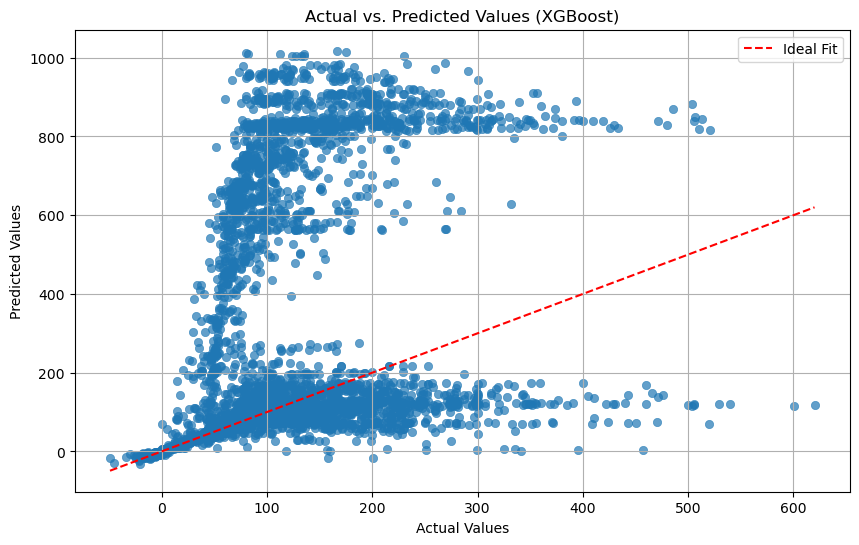

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_xgb_test, y=y_xgb_pred, alpha=0.7, edgecolor=None)
plt.plot([min(y_xgb_test), max(y_xgb_test)], [min(y_xgb_test), max(y_xgb_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


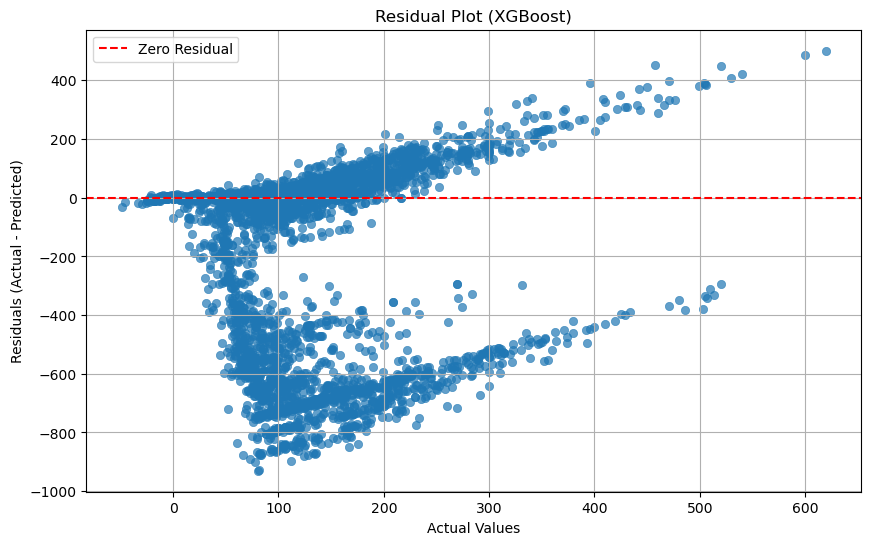

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_xgb_test - y_xgb_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_xgb_test, y=residuals, alpha=0.7, edgecolor=None)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


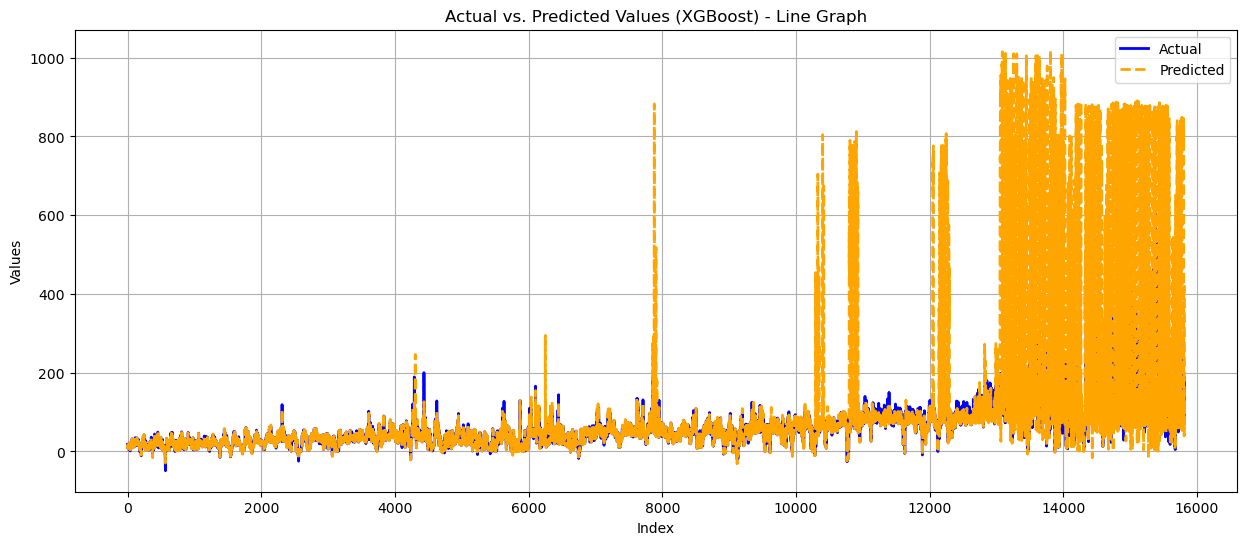

In [35]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values as a line graph
plt.figure(figsize=(15, 6))
plt.plot(y_xgb_test.values, label='Actual', color='blue', linewidth=2)
plt.plot(y_xgb_pred, label='Predicted', color='orange', linewidth=2, linestyle='--')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (XGBoost) - Line Graph')
plt.legend()
plt.grid(True)
plt.show()


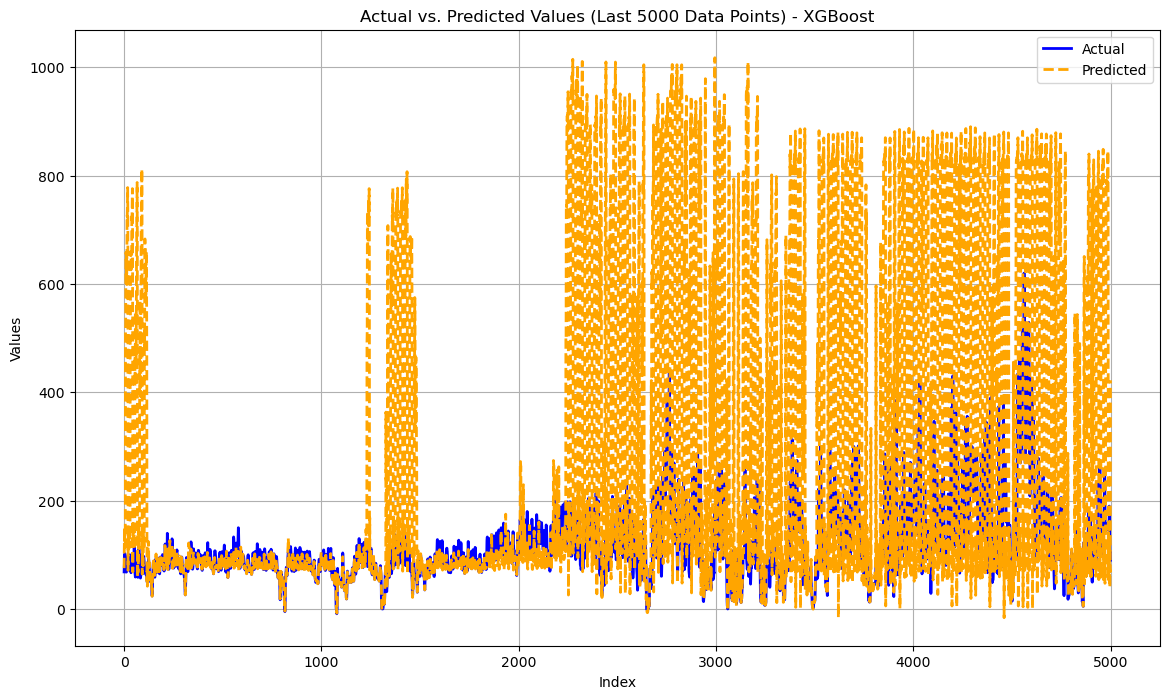

In [39]:
import matplotlib.pyplot as plt

# Get a part of visulization
n_last = 5000
y_xgb_test_last = y_xgb_test.values[-n_last:]
y_xgb_pred_last = y_xgb_pred[-n_last:]

# Plot actual vs. predicted values for the last portion as a line graph
plt.figure(figsize=(14, 8))  # Larger graph size
plt.plot(y_xgb_test_last, label='Actual', color='blue', linewidth=2)
plt.plot(y_xgb_pred_last, label='Predicted', color='orange', linewidth=2, linestyle='--')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(f'Actual vs. Predicted Values (Last {n_last} Data Points) - XGBoost')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Evaluate performance
xgb_rmse = np.sqrt(mean_squared_error(y_xgb_test, y_xgb_pred))
print(f'XGBoost RMSE: {xgb_rmse}')


XGBoost RMSE: 189.36709470653204


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(y_xgb_test, y_xgb_pred))
mse = mean_squared_error(y_xgb_test, y_xgb_pred)
mae = mean_absolute_error(y_xgb_test, y_xgb_pred)

# Display the results
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


RMSE: 189.3671
MSE: 35859.8966
MAE: 64.0533
